## Ehrenfest simulation of the spin boson model

A useful reference for spin boson dynamics: http://www.cchem.berkeley.edu/millergrp/pdf/339.pdf

A note on bath discretization: https://github.com/arkajitmandal/Bath-Discretization/blob/master/bath.ipynb

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from numpy.fft import fft, ifft, fftshift
from jax import vmap, numpy as jnp, scipy as jsp
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join(
    '/Users/ankitmahajan/softwares/scd'))
if module_path not in sys.path:
    sys.path.append(module_path)

from scd import system, propagator, driver, spin_boson

### Adiabatic bath, weak coupling, and high temperature

# Number of cores: 1

Trajectory 0 done in 0.30 seconds
Trajectory 100 done in 2.95 seconds
Trajectory 200 done in 5.61 seconds
Trajectory 300 done in 8.33 seconds
Trajectory 400 done in 11.13 seconds
Trajectory 500 done in 13.81 seconds
Trajectory 600 done in 16.98 seconds
Trajectory 700 done in 20.16 seconds
Trajectory 800 done in 22.84 seconds
Trajectory 900 done in 25.75 seconds
Wall time: 28.43 seconds


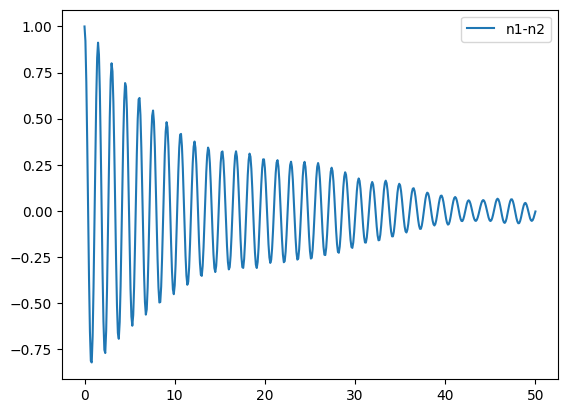

In [61]:
sys = system.system(n_states=2, beta=0.5)
omega, c = system.debye_bath(100, gamma=0.25, lam=0.025, omega_max=5.0)
ham = spin_boson.spin_boson(omega, c, delta=1.0)
prop = propagator.propagator(
    prop_time=50, dt_nuc=0.01, dt_e_steps_half=10
) 
init_elec_state = jnp.zeros((sys.n_states)) + 0.0j
init_elec_state = init_elec_state.at[0].set(1.0)
init_elec_state = init_elec_state / jnp.linalg.norm(init_elec_state)
populations = driver.driver(
    sys, ham, prop, n_trajectories=1000, seed=0, init_elec_state=init_elec_state
)
times = jnp.linspace(0, prop.prop_time, populations.shape[0])
plt.plot(times, populations[:, 0] - populations[:, 1], label="n1-n2")
plt.legend()
plt.show()

### Adiabatic bath, intermediate coupling, and high temperature

# Number of cores: 1

Trajectory 0 done in 0.03 seconds
Trajectory 100 done in 2.21 seconds
Trajectory 200 done in 4.43 seconds
Trajectory 300 done in 6.61 seconds
Trajectory 400 done in 8.80 seconds
Trajectory 500 done in 10.92 seconds
Trajectory 600 done in 13.11 seconds
Trajectory 700 done in 15.21 seconds
Trajectory 800 done in 17.29 seconds
Trajectory 900 done in 19.46 seconds
Wall time: 21.61 seconds


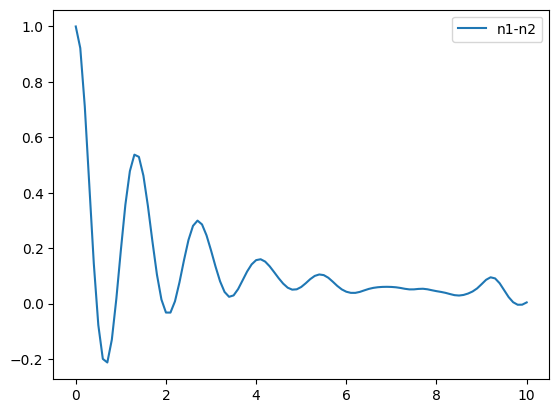

In [81]:
sys = system.system(n_states=2, beta=0.5)
omega, c = system.debye_bath(100, gamma=0.25, lam=0.25, omega_max=5.0)
ham = spin_boson.spin_boson(omega, c, delta=1.0)
prop = propagator.propagator(
    prop_time=10, dt_nuc=0.01, dt_e_steps_half=10
)
init_elec_state = jnp.zeros((sys.n_states)) + 0.0j
init_elec_state = init_elec_state.at[0].set(1.0)
init_elec_state = init_elec_state / jnp.linalg.norm(init_elec_state)
populations = driver.driver(
    sys, ham, prop, n_trajectories=1000, seed=0, init_elec_state=init_elec_state
)
times = jnp.linspace(0, prop.prop_time, populations.shape[0])
plt.plot(times, populations[:, 0] - populations[:, 1], label="n1-n2")
plt.legend()
plt.show()

### Adiabatic bath, strong coupling, and high temperature

# Number of cores: 1

Trajectory 0 done in 0.32 seconds
Trajectory 100 done in 2.44 seconds
Trajectory 200 done in 4.56 seconds
Trajectory 300 done in 6.74 seconds
Trajectory 400 done in 8.86 seconds
Trajectory 500 done in 10.97 seconds
Trajectory 600 done in 13.07 seconds
Trajectory 700 done in 15.20 seconds
Trajectory 800 done in 17.31 seconds
Trajectory 900 done in 19.41 seconds
Wall time: 21.49 seconds


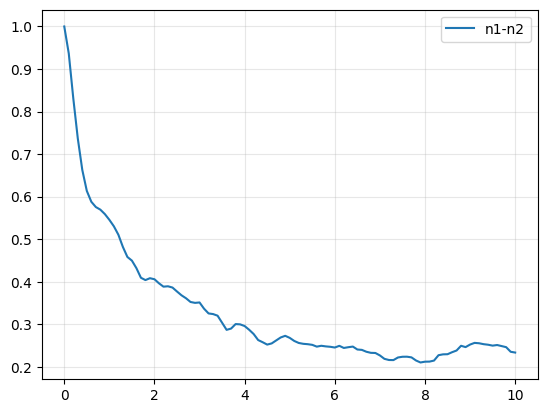

In [80]:
sys = system.system(n_states=2, beta=0.5)
omega, c = system.debye_bath(100, gamma=0.25, lam=5.0, omega_max=5.0)
ham = spin_boson.spin_boson(omega, c, delta=1.0)
prop = propagator.propagator(prop_time=10, dt_nuc=0.01, dt_e_steps_half=10)
init_elec_state = jnp.zeros((sys.n_states)) + 0.0j
init_elec_state = init_elec_state.at[0].set(1.0)
init_elec_state = init_elec_state / jnp.linalg.norm(init_elec_state)
populations = driver.driver(
    sys, ham, prop, n_trajectories=1000, seed=0, init_elec_state=init_elec_state
)
times = jnp.linspace(0, prop.prop_time, populations.shape[0])
plt.plot(times, populations[:, 0] - populations[:, 1], label="n1-n2")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### Adiabatic bath, intermediate coupling, and low temperature

# Number of cores: 1

Trajectory 0 done in 0.30 seconds
Trajectory 50 done in 1.38 seconds
Trajectory 100 done in 2.41 seconds
Trajectory 150 done in 3.56 seconds
Trajectory 200 done in 4.59 seconds
Trajectory 250 done in 5.63 seconds
Trajectory 300 done in 6.66 seconds
Trajectory 350 done in 7.70 seconds
Trajectory 400 done in 8.73 seconds
Trajectory 450 done in 9.76 seconds
Wall time: 10.77 seconds


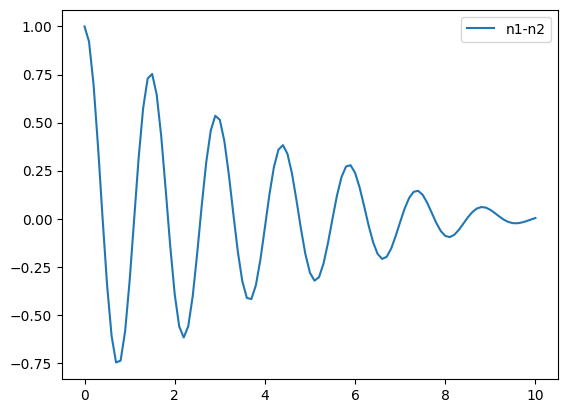

In [60]:
sys = system.system(n_states=2, beta=5.)
omega, c = system.debye_bath(100, gamma=0.25, lam=0.25, omega_max=5.0)
ham = spin_boson.spin_boson(omega, c, delta=1.0)
prop = propagator.propagator(prop_time=10, dt_nuc=0.01, dt_e_steps_half=10)
init_elec_state = jnp.zeros((sys.n_states)) + 0.0j
init_elec_state = init_elec_state.at[0].set(1.0)
init_elec_state = init_elec_state / jnp.linalg.norm(init_elec_state)
populations = driver.driver(
    sys, ham, prop, n_trajectories=500, seed=0, init_elec_state=init_elec_state
)
times = jnp.linspace(0, prop.prop_time, populations.shape[0])
plt.plot(times, populations[:, 0] - populations[:, 1], label="n1-n2")
plt.legend()
plt.show()